In [41]:
import numpy as np
import pickle as pickle
import gudhi as gd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import MDS

# 1. The data

In [2]:
f = open("data/data_acc_rot.dat","rb")
data = pickle.load(f,encoding="latin1")
f.close()

data_A = np.array(data[0])
data_B = np.array(data[1])
data_C = np.array(data[2])
label = np.array(data[3])

time_serie = data_A[0,:,:]
print(time_serie.shape)

(200, 3)


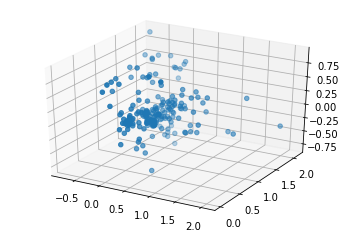

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(time_serie[:, 0], time_serie[:, 1], time_serie[:, 2]);

# 2. Persistance diagrams

In [4]:
max_edge_length = 0.2
skeleton = gd.RipsComplex(points=time_serie, max_edge_length=max_edge_length)
simplex_tree = skeleton.create_simplex_tree(max_dimension=2)

In [10]:
# rips_generator = simplex_tree.get_filtration()
simplex_tree.persistence()
rips_barcodes_0 = simplex_tree.persistence_intervals_in_dimension(0)
rips_barcodes_1 = simplex_tree.persistence_intervals_in_dimension(1)

In [11]:
rips_barcodes_2[-10:]

array([], dtype=float64)

usetex mode requires dvipng.


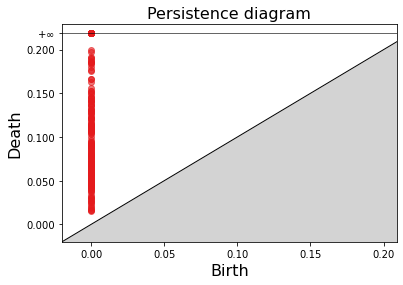

In [12]:
gd.plot_persistence_diagram(rips_barcodes_0)

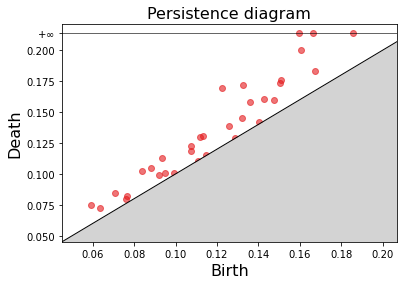

In [13]:
gd.plot_persistence_diagram(rips_barcodes_1)

# 3. Pairwise bottleneck distance

In [111]:
f = open("data/persistence_diagrams_0.8.dat","rb")
data = pickle.load(f)
f.close()

In [112]:
def get_pairwise_bottleneck_distance_matrix(persistence_diagrams):
    distance_matrix = np.zeros((300,300))
    for i, pd1 in enumerate(tqdm(persistence_diagrams)):
        for j, pd2 in enumerate(persistence_diagrams[i+1:], i+1):
            
            distance_matrix[i,j] = distance_matrix[j,i] = gd.bottleneck_distance(pd1,pd2)
    
    return distance_matrix

distance_matrix_0, distance_matrix_1 = list(map(get_pairwise_bottleneck_distance_matrix, data))

100%|██████████| 300/300 [00:27<00:00, 10.96it/s]


In [113]:
distance_matrix_1[0,:40]

array([0.        , 0.08186699, 0.06658741, 0.09018938, 0.09126953,
       0.08186699,        inf, 0.05788166, 0.08186699,        inf,
       0.08186699, 0.05623288, 0.08186699, 0.08186699, 0.06883524,
              inf, 0.08186699, 0.08186699, 0.04475686, 0.06564203,
       0.05424153, 0.07133855, 0.0658374 , 0.04974124, 0.07984351,
       0.08186699,        inf, 0.08186699, 0.04030701, 0.05985773,
              inf, 0.02579894, 0.05424153, 0.07739581, 0.04423793,
       0.05461536, 0.07423133, 0.06710561, 0.05869551, 0.06921787])

In [114]:
correction = np.copy(distance_matrix_1)
for i in range(300):
    for j in range(300):
        if distance_matrix_1[i,j] == np.inf:
            correction[i,j] = 1

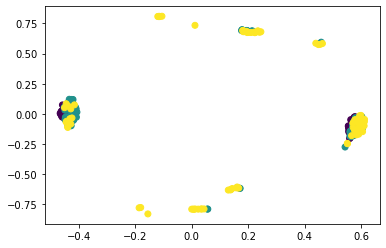

In [117]:
mds = MDS(n_components=2, dissimilarity='precomputed')
projection = mds.fit_transform(correction)

plt.scatter(projection[:,0], projection[:,1], c=[0]*100+[1]*100+[2]*100)
plt.savefig("data/test.jpg")

# 4. Landscapes
* https://gudhi.inria.fr/doc/3.1.1/group___persistence__representations.html gudhi library qui le fait peut-être

* http://www-sop.inria.fr/teams/abs/teaching/centrale-FGMDA/slides_mathieu/class7%20-%202.pdf slide 55, le cours qui explique